<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/bt_w7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = '/content/Churn_Modelling.csv'
data = pd.read_csv(url)
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

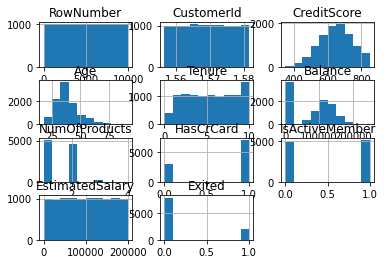

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

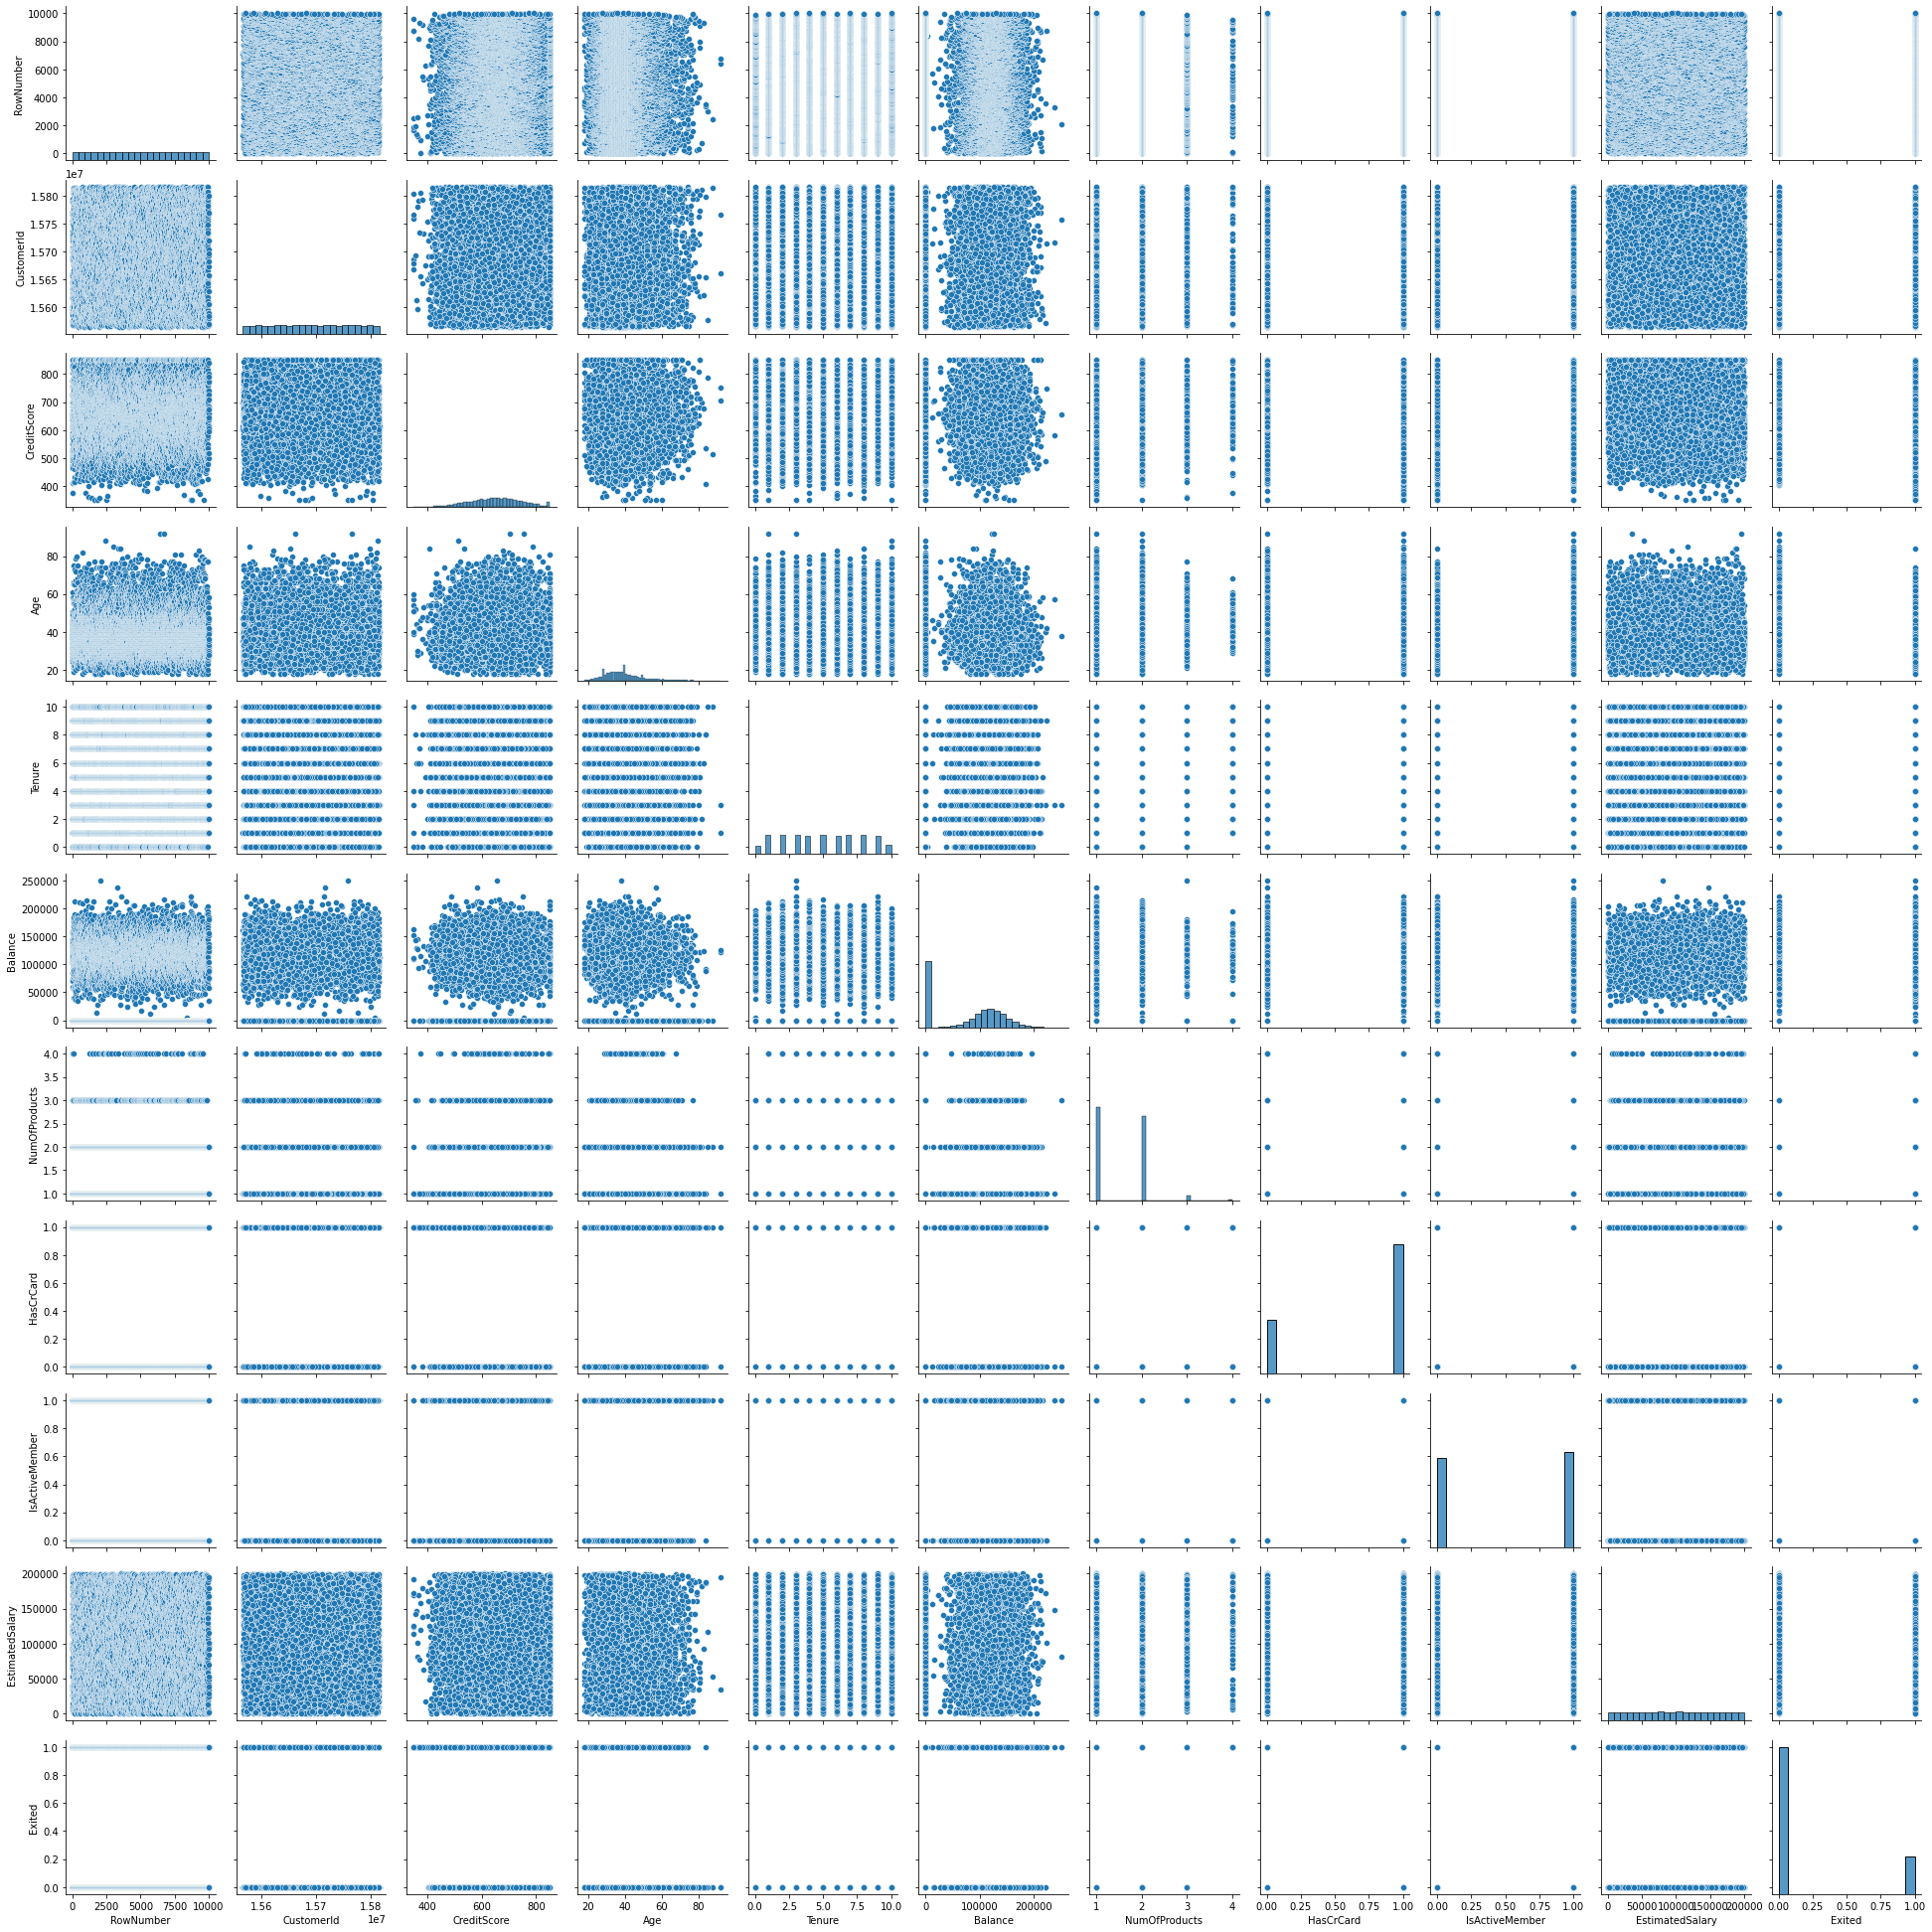

In [ ]:
sns.pairplot(data)

<Axes: >

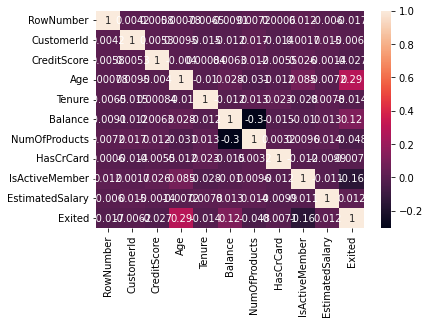

In [ ]:
sns.heatmap(correlation,annot=True)

<Axes: xlabel='RowNumber', ylabel='Age'>

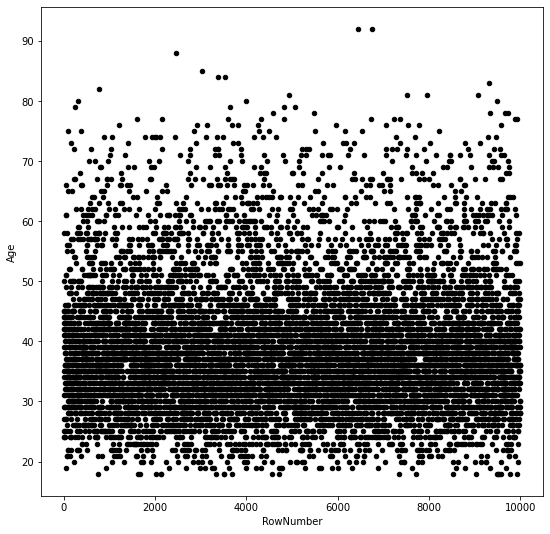

In [ ]:
data.plot(kind='scatter',x='RowNumber',y='Age',figsize=(9,9),color='black')

In [ ]:
from sklearn import linear_model

import numpy as np
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['RowNumber']),y=data['Age'])
print('gia tri intcvcept la:',model.intercept_)
print('gia tri coffient la:',model.coef_)
print('do chinh xac',model.score(pd.DataFrame(data['RowNumber']),data['Age']))

gia tri intcvcept la: 38.90758277827783
gia tri coffient la: [2.84316003e-06]
do chinh xac 6.12485008044672e-07


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


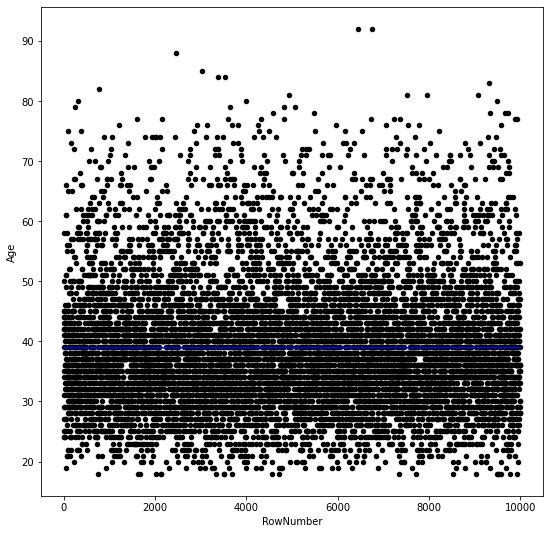

In [ ]:
data.plot(kind='scatter',x='RowNumber',y='Age',figsize=(9,9),color='black')
y_pred=model.predict(pd.DataFrame(data['RowNumber']))
plt.plot(data['RowNumber'],y_pred,color='blue')

he so Intercept la: 38.74603501543993
he so coeffient la: [ 9.97524359e-05 -9.68995859e-09]
do chinh xac mo hinh: 4.8041643452734206e-05


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


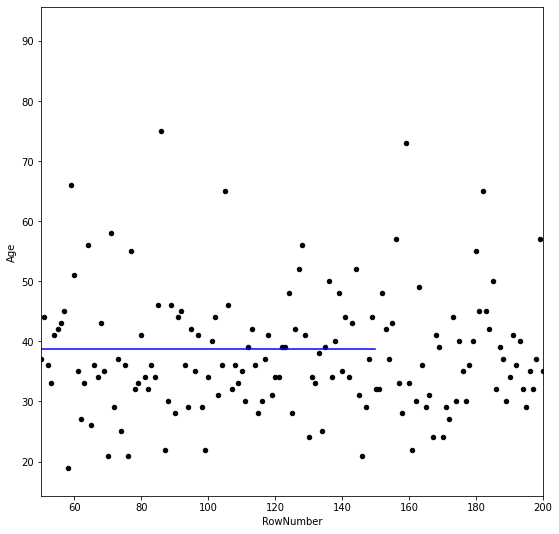

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['RowNumber'],data['RowNumber']**2]).T
y=data['Age']
model.fit(X,data['Age'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='RowNumber',y='Age',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 38.81182578936639
he so coeffient la: [ 1.52617275e-11  3.85119089e-08 -7.78104648e-12  3.95899907e-16
 -3.23857753e-20]
do chinh xac mo hinh: 0.00016831036693909507


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


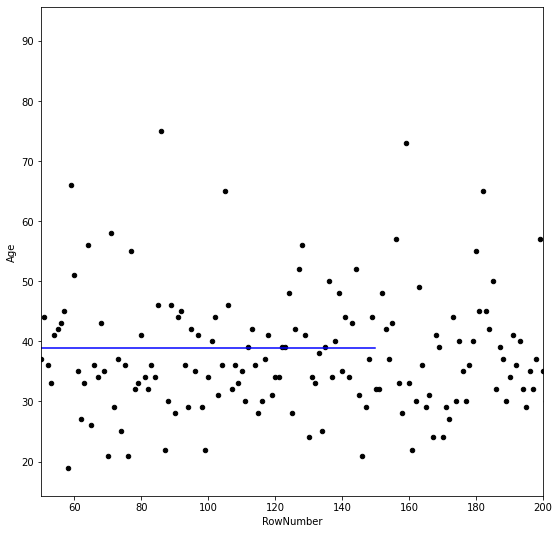

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['RowNumber'],data['RowNumber']**2,data['RowNumber']**3,data['RowNumber']**4,data['RowNumber']**5]).T
y=data['Age']
model.fit(X,data['Age'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='RowNumber',y='Age',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 38.80201700030172
he so coeffient la: [ 1.65810179e-11  4.18393353e-08 -8.54982334e-12  4.41579591e-16
 -3.21398959e-20 -4.22192985e-21  3.04915317e-20 -3.27232650e-21
  1.61366394e-20  2.85658553e-20]
do chinh xac mo hinh: 0.0006683742961575145


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


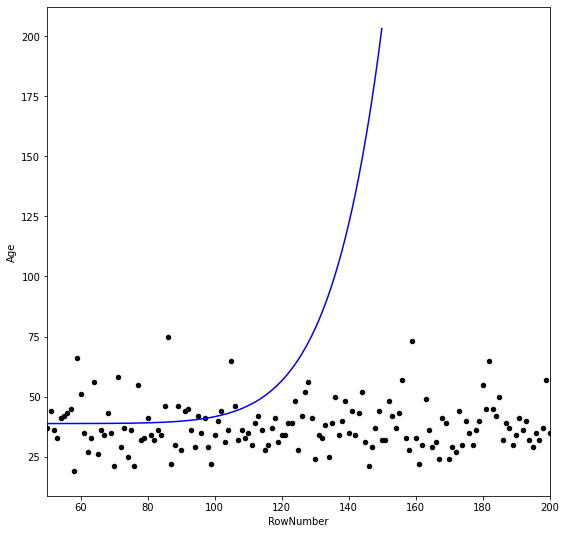

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['RowNumber'],data['RowNumber']**2,data['RowNumber']**3,data['RowNumber']**4,data['RowNumber']**5,data['RowNumber']**6,data['RowNumber']**7,data['RowNumber']**8,data['RowNumber']**9,data['RowNumber']**10]).T
y=data['Age']
model.fit(X,data['Age'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='RowNumber',y='Age',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

In [ ]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['RowNumber','Balance']], y=data['Age'])
print('he thong coeffient',model.coef_)
print('he so intercept',model.intercept_)
print('do chinh xac',model.score(data.loc[:,['RowNumber','Balance']],data['Age']))

he thong coeffient [3.77590195e-06 4.75967742e-06]
he so intercept 38.53887044209232
do chinh xac 0.0008024439034237663


In [ ]:
import pandas as pd
url = '/content/wine_data.csv'
data = pd.read_csv(url)
data.head()

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450

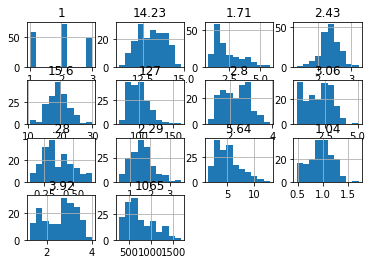

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

              1     14.23      1.71      2.43      15.6       127       2.8  \
1      1.000000 -0.321238  0.436127 -0.048260  0.513963 -0.198944 -0.717933   
14.23 -0.321238  1.000000  0.099963  0.210964 -0.303350  0.258742  0.284543   
1.71   0.436127  0.099963  1.000000  0.164955  0.286148 -0.049049 -0.333512   
2.43  -0.048260  0.210964  0.164955  1.000000  0.446698  0.287107  0.128176   
15.6   0.513963 -0.303350  0.286148  0.446698  1.000000 -0.071707 -0.317583   
127   -0.198944  0.258742 -0.049049  0.287107 -0.071707  1.000000  0.208200   
2.8   -0.717933  0.284543 -0.333512  0.128176 -0.317583  0.208200  1.000000   
3.06  -0.846485  0.230133 -0.409324  0.114084 -0.346922  0.187101  0.864046   
.28    0.487215 -0.151445  0.291501  0.187354  0.359395 -0.252091 -0.448301   
2.29  -0.494887  0.127561 -0.217975  0.008082 -0.190779  0.226504  0.610533   
5.64   0.268562  0.547883  0.250053  0.258643  0.020478  0.199337 -0.056401   
1.04  -0.617690 -0.075375 -0.560854 -0.075181 -0.272

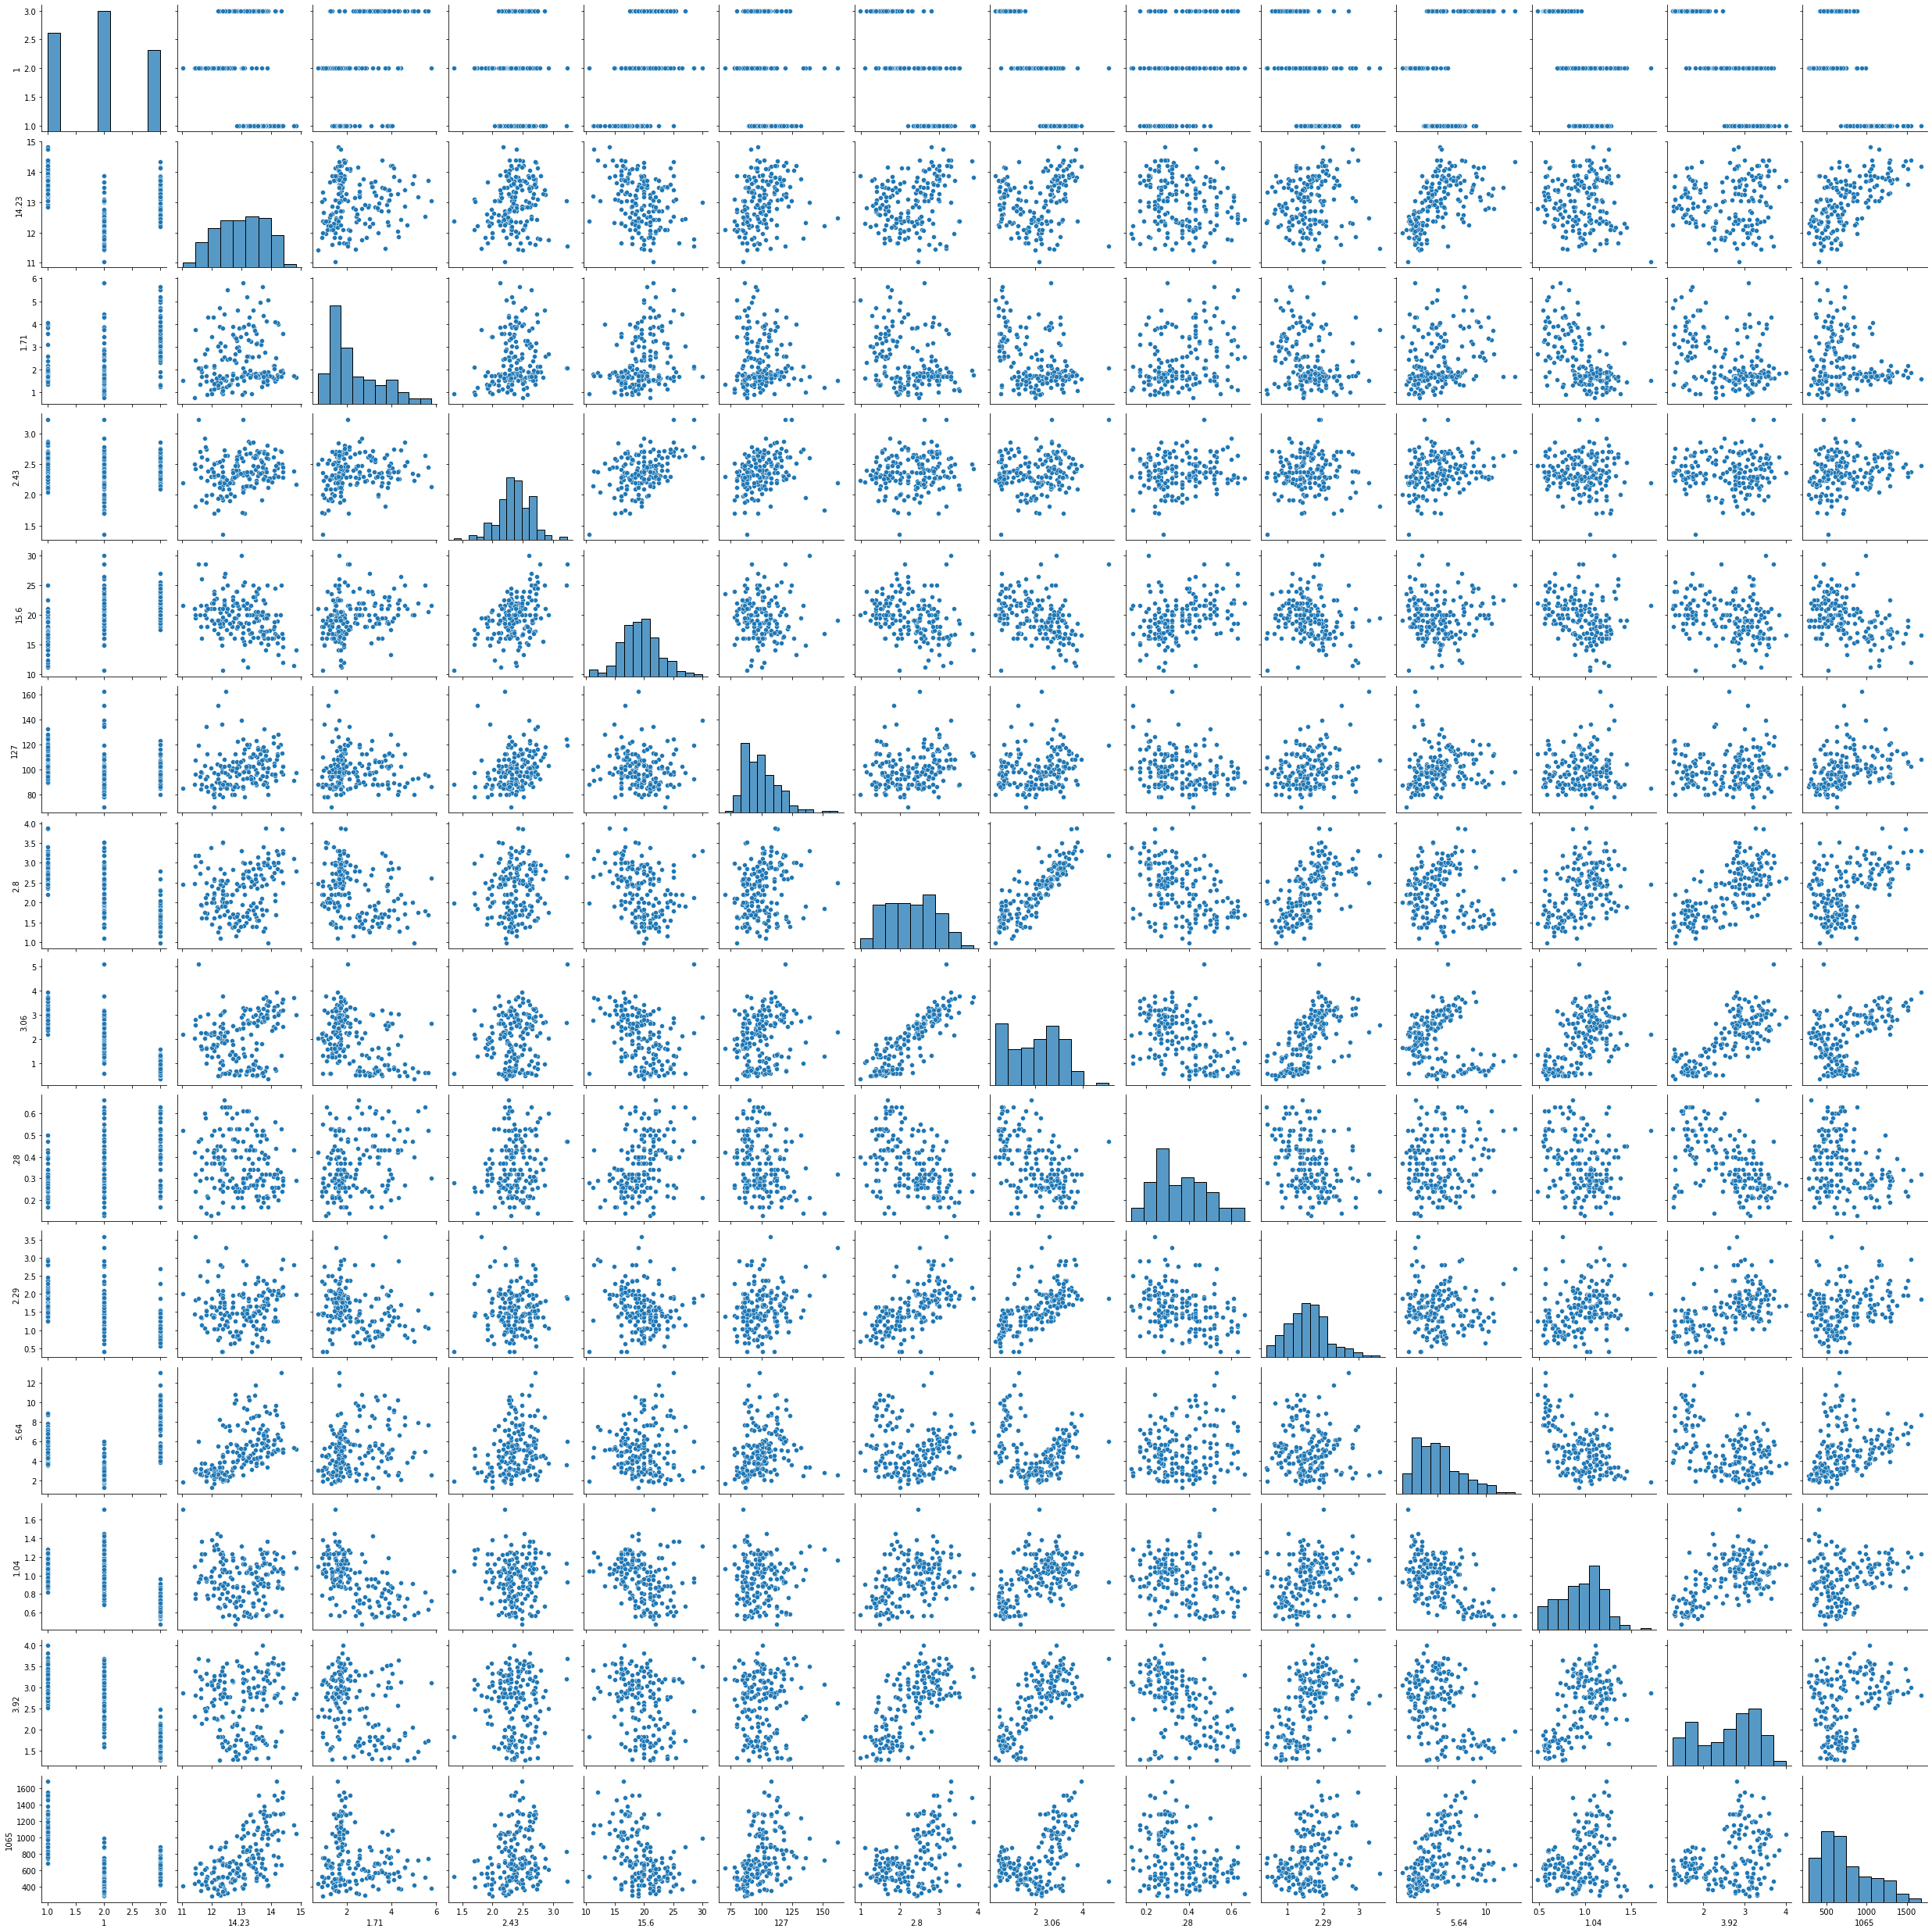

In [ ]:
sns.pairplot(data)

<Axes: >

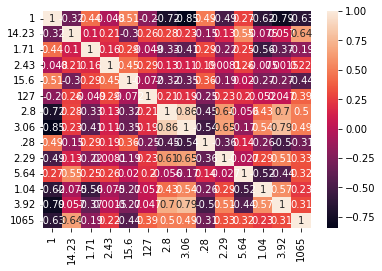

In [ ]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='1065', ylabel='14.23'>

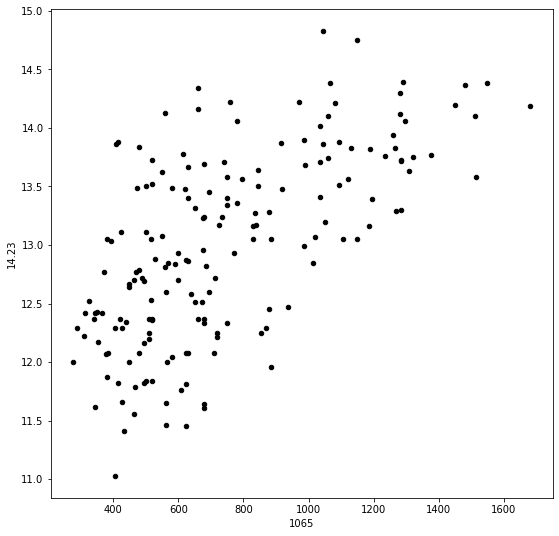

In [ ]:
data.plot(kind='scatter',x='1065',y='14.23',figsize=(9,9),color='black')

In [ ]:
from sklearn import linear_model

import numpy as np
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['1065']),y=data['14.23'])
print('gia tri intcvcept la:',model.intercept_)
print('gia tri coffient la:',model.coef_)
print('do chinh xac',model.score(pd.DataFrame(data['1065']),data['14.23']))

gia tri intcvcept la: 11.766766842798773
gia tri coffient la: [0.00164664]
do chinh xac 0.410967665620662


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


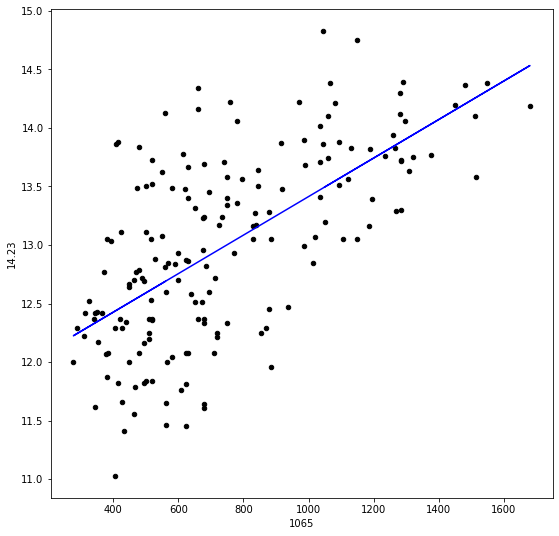

In [ ]:
data.plot(kind='scatter',x='1065',y='14.23',figsize=(9,9),color='black')
y_pred=model.predict(pd.DataFrame(data['1065']))
plt.plot(data['1065'],y_pred,color='blue')

he so Intercept la: 11.522429502035639
he so coeffient la: [ 2.31038911e-03 -3.82738331e-07]
do chinh xac mo hinh: 0.4134830561724463


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


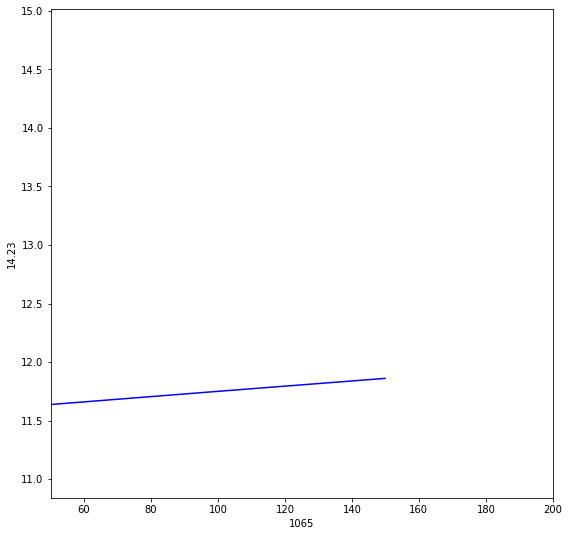

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['1065'],data['1065']**2]).T
y=data['14.23']
model.fit(X,data['14.23'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='1065',y='14.23',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 12.169727915168973
he so coeffient la: [ 1.94497462e-09  7.62423028e-07  2.87182326e-09 -3.07701298e-12
  8.06126265e-16 -2.08052468e-20 -1.16467030e-20 -1.19114008e-20
  1.49818953e-20 -1.18055217e-20]
do chinh xac mo hinh: 0.4424476014523747


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


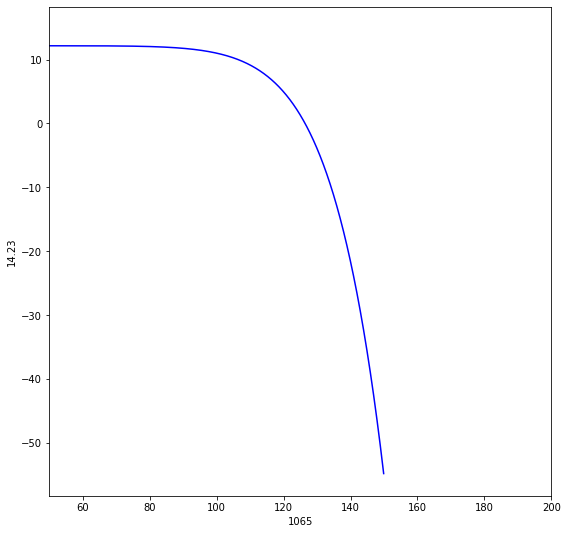

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['1065'],data['1065']**2,data['1065']**3,data['1065']**4,data['1065']**5,data['1065']**6,data['1065']**7,data['1065']**8,data['1065']**9,data['1065']**10]).T
y=data['14.23']
model.fit(X,data['14.23'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='1065',y='14.23',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

In [ ]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['1065','1']], y=data['14.23'])
print('he thong coeffient',model.coef_)
print('he so intercept',model.intercept_)
print('do chinh xac',model.score(data.loc[:,['1065','1']],data['14.23']))

he thong coeffient [0.00187149 0.1449157 ]
he so intercept 11.317590342549558
do chinh xac 0.4225363814302876


In [ ]:
import pandas as pd
url = '/content/pima-indians-diabetes.csv'
data = pd.read_csv(url)
data.head()

6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

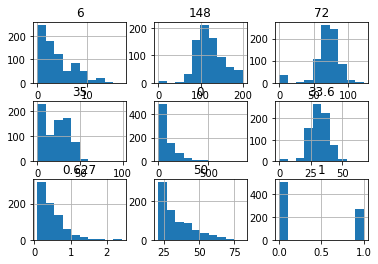

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

              6       148        72        35         0      33.6     0.627  \
6      1.000000  0.128846  0.141197 -0.082495 -0.072999  0.017518 -0.033927   
148    0.128846  1.000000  0.152498  0.056381  0.332383  0.220955  0.136903   
72     0.141197  0.152498  1.000000  0.207308  0.089098  0.281777  0.041180   
35    -0.082495  0.056381  0.207308  1.000000  0.437974  0.392553  0.183498   
0     -0.072999  0.332383  0.089098  0.437974  1.000000  0.198111  0.185579   
33.6   0.017518  0.220955  0.281777  0.392553  0.198111  1.000000  0.140546   
0.627 -0.033927  0.136903  0.041180  0.183498  0.185579  0.140546  1.000000   
50     0.544018  0.262408  0.239571 -0.115873 -0.040942  0.035911  0.032738   
1      0.221087  0.465856  0.064882  0.073265  0.131984  0.292695  0.173245   

             50         1  
6      0.544018  0.221087  
148    0.262408  0.465856  
72     0.239571  0.064882  
35    -0.115873  0.073265  
0     -0.040942  0.131984  
33.6   0.035911  0.292695  
0.627  0.0327

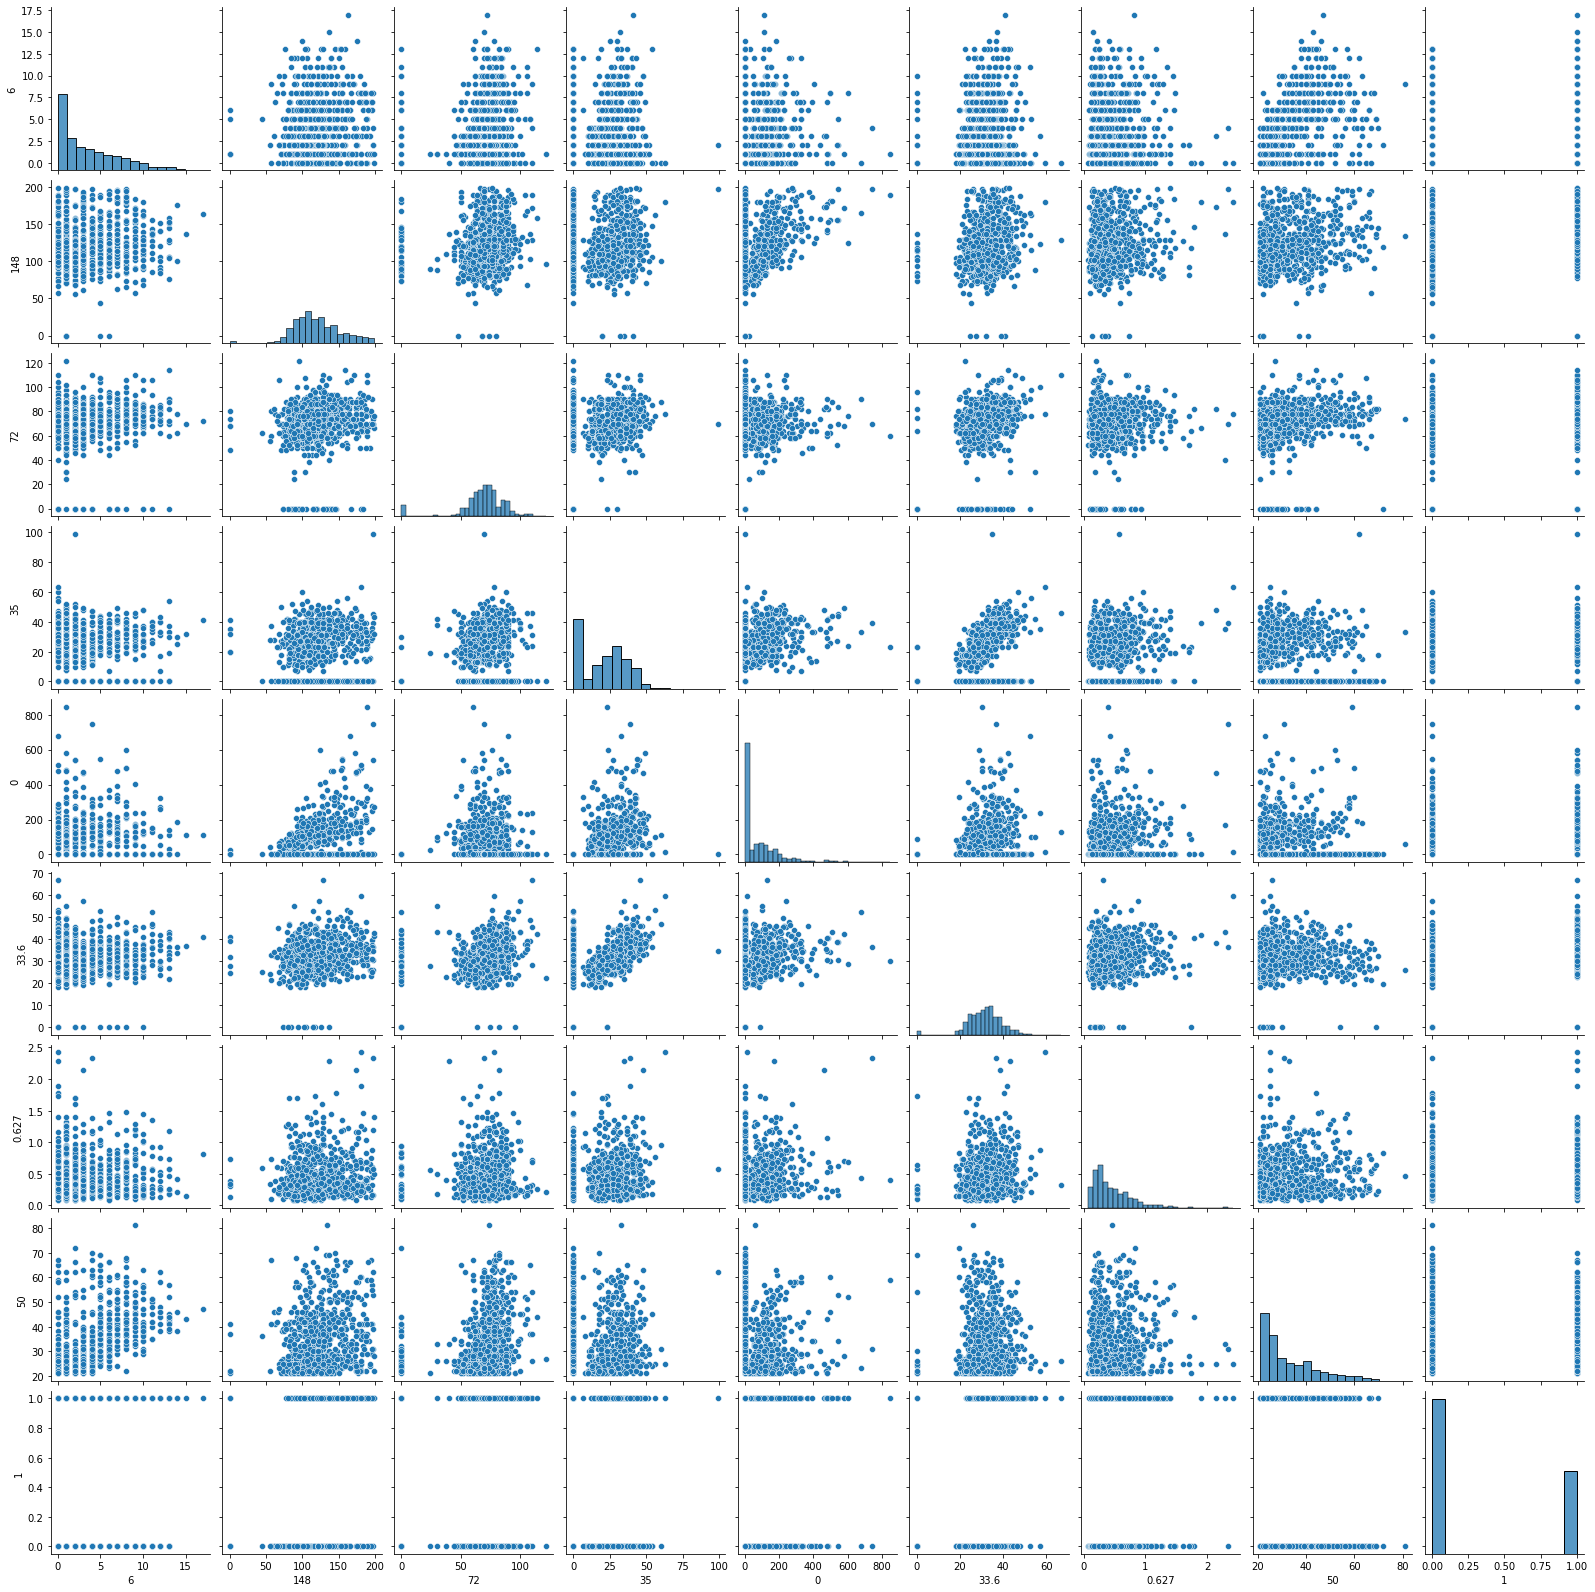

In [ ]:
sns.pairplot(data)

<Axes: >

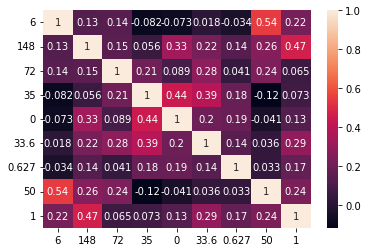

In [ ]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='148', ylabel='1'>

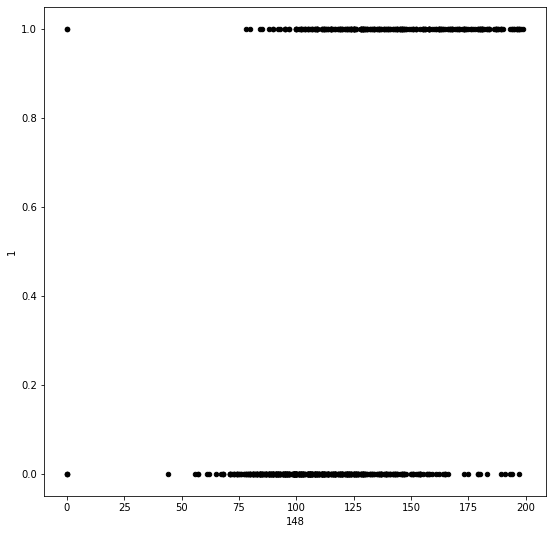

In [ ]:
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black')

In [ ]:
from sklearn import linear_model

import numpy as np
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['148']),y=data['1'])
print('gia tri intcvcept la:',model.intercept_)
print('gia tri coffient la:',model.coef_)
print('do chinh xac',model.score(pd.DataFrame(data['148']),data['1']))

gia tri intcvcept la: -0.49116150220831356
gia tri coffient la: [0.00694421]
do chinh xac 0.21702175547111913


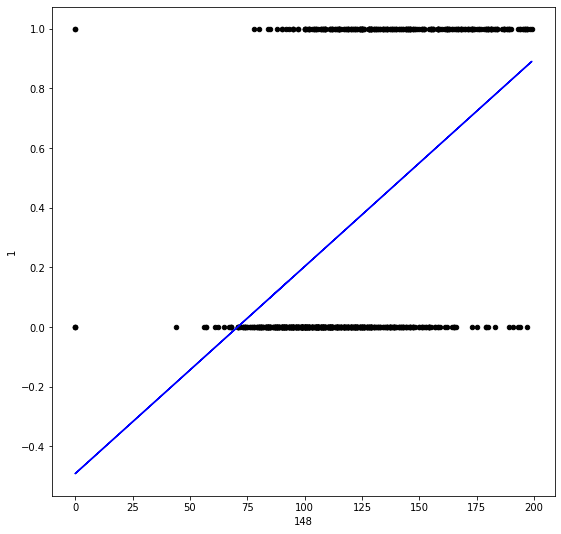

In [ ]:
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black')
y_pred=model.predict(pd.DataFrame(data['148']))
plt.plot(data['148'],y_pred,color='blue')

he so Intercept la: 0.05656622294850866
he so coeffient la: [-2.55254790e-03  3.83947537e-05]
do chinh xac mo hinh: 0.23463840521293067


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


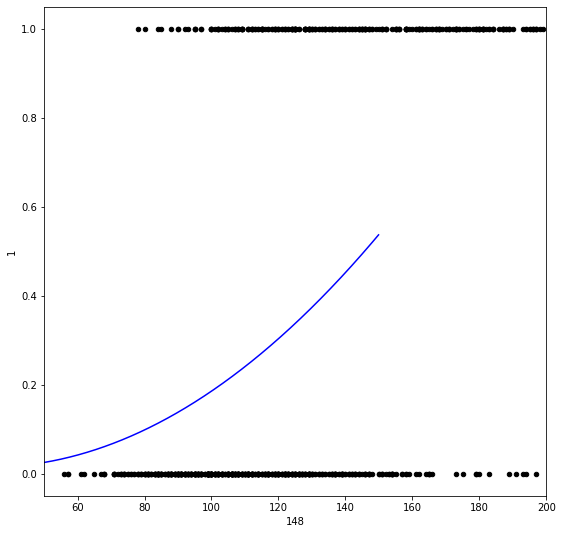

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['148'],data['148']**2]).T
y=data['1']
model.fit(X,data['1'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 0.39954150929761567
he so coeffient la: [-2.67365578e-08 -1.47795277e-06 -1.84107922e-05  5.61075566e-07
 -6.87673578e-09  4.21598607e-11 -1.28329786e-13  1.54267993e-16
 -3.75870870e-21  2.54109884e-21]
do chinh xac mo hinh: 0.2477009685939242


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


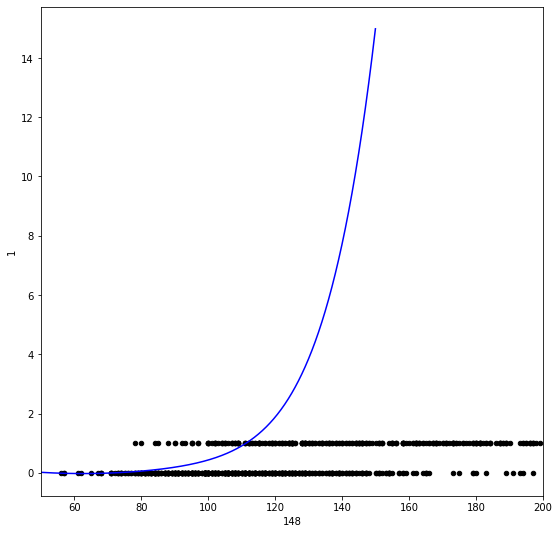

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['148'],data['148']**2,data['148']**3,data['148']**4,data['148']**5,data['148']**6,data['148']**7,data['148']**8,data['148']**9,data['148']**10]).T
y=data['1']
model.fit(X,data['1'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 0.36102584484962846
he so coeffient la: [-1.56482728e-08  1.97605877e-06 -1.41888396e-05  3.97812804e-07
 -4.39965261e-09  2.37440621e-11 -6.13289417e-14  5.88063212e-17
 -4.23516474e-21  1.69406589e-21 -1.27054942e-21 -9.52912066e-22
  1.83799532e-21  5.87629107e-21 -3.70576914e-21]
do chinh xac mo hinh: 0.25162282103843525


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


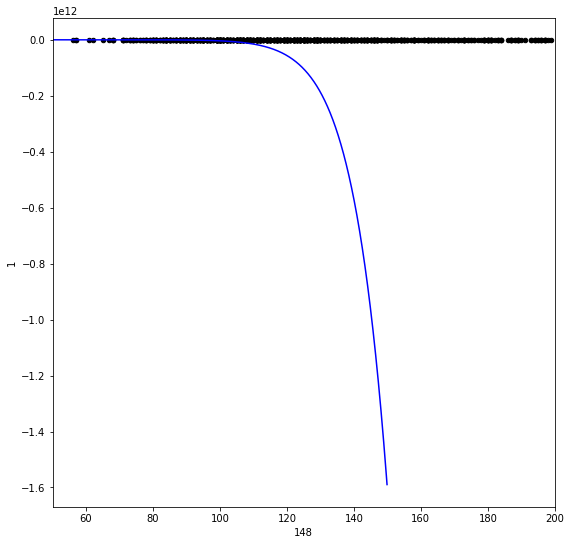

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['148'],data['148']**2,data['148']**3,data['148']**4,data['148']**5,data['148']**6,data['148']**7,data['148']**8,data['148']**9,data['148']**10
                ,data['148']**11,data['148']**12,data['148']**13,data['148']**14,data['148']**15]).T
y=data['1']
model.fit(X,data['1'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10,range**11,range**12,range**13,range**14,range**15]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

he so Intercept la: 0.3807120458813602
he so coeffient la: [-1.34317311e-08  3.46594378e-07 -1.35295106e-05  3.70511012e-07
 -3.99344025e-09  2.09402836e-11 -5.21563040e-14  4.72738728e-17
 -4.49326296e-21 -1.67624240e-22 -4.40316721e-21 -3.21962688e-21
 -1.52022517e-22  4.09573372e-21 -4.08512555e-21 -1.94449846e-21
  2.41821252e-21  4.34104385e-21 -8.40415502e-22 -1.48230766e-21]
do chinh xac mo hinh: 0.253221065701719


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


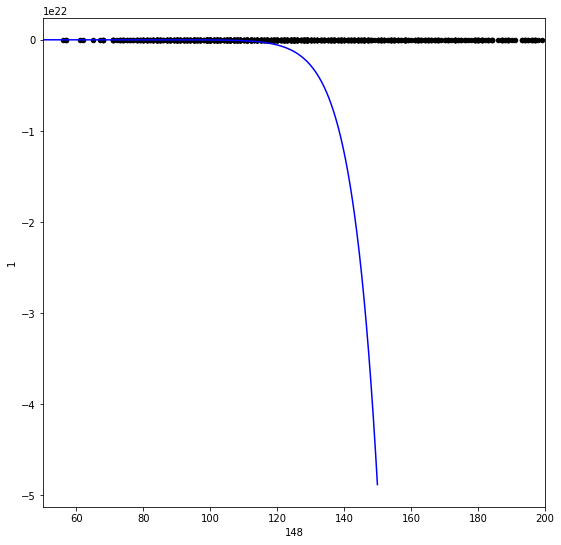

In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['148'],data['148']**2,data['148']**3,data['148']**4,data['148']**5,data['148']**6,data['148']**7,data['148']**8,data['148']**9,data['148']**10
                ,data['148']**11,data['148']**12,data['148']**13,data['148']**14,data['148']**15,data['148']**16,data['148']**17,data['148']**18,data['148']**19,data['148']**20]).T
y=data['1']
model.fit(X,data['1'])
print('he so Intercept la:',model.intercept_)
print('he so coeffient la:',model.coef_)
print('do chinh xac mo hinh:',model.score(X,y))
range =np.arange(1.5,150,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10,range**11,range**12,range**13,range**14,range**15,range**16,range**17,range**18,range**19,range**20]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x='148',y='1',figsize=(9,9),color='black',xlim=(50,200))
plt.plot(range,y_pred,color='blue')

In [ ]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['148','35']], y=data['1'])
print('he thong coeffient',model.coef_)
print('he so intercept',model.intercept_)
print('do chinh xac',model.score(data.loc[:,['148','35']],data['1']))

he thong coeffient [0.00690458 0.00140875]
he so intercept -0.5152764595070071
do chinh xac 0.2192377520072455
